In [1]:
import os, sys
import multiprocessing as mp
import numpy as np
import osmnx as ox
from shapely.geometry import shape
import pandas as pd
import json

def load_src(name, fpath):
    import os, imp
    p = fpath if os.path.isabs(fpath) \
        else os.path.join(os.path.dirname(os.path.abspath('')), fpath)
    return imp.load_source(name, p)
load_src("utils", "utils.py")
import utils

%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.16.2'

In [2]:
place = 'Porto'


In [3]:
json_file = open("../../data/porto_city_boundary.geojson")
train1000 = pd.read_csv('../../data/train-1000.csv')

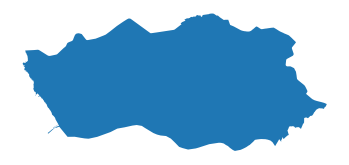

In [4]:
city = ox.geocode_to_gdf(place)
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

In [29]:
map_data = json.load(json_file)
boundary_polygon = shape(map_data["geometries"][0])
G = ox.graph_from_polygon(boundary_polygon, network_type='drive')

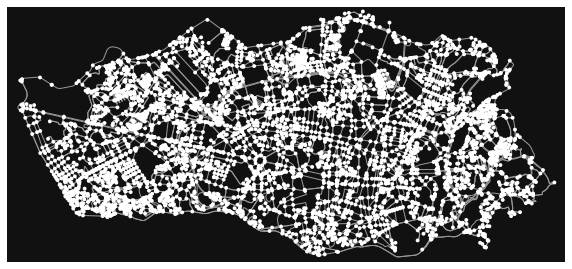

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [30]:
ox.plot_graph(G, figsize=(10, 10))

In [7]:
G2 = utils.load_G_from_N_and_E('../../data/porto')

KeyError: "None of [Index(['x', 'y'], dtype='object')] are in the [columns]"

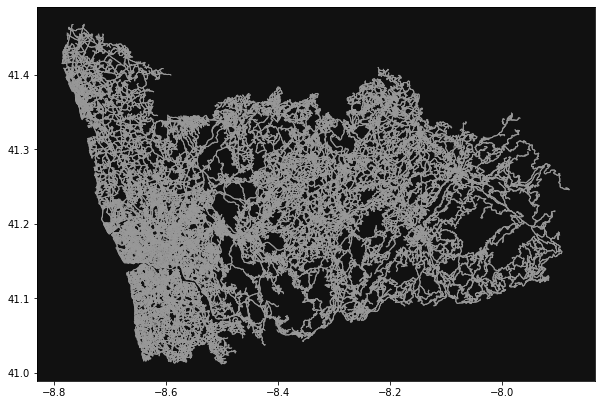

In [8]:
ox.plot_graph(G2, figsize=(10, 10))